In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn import tree
import pickle
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
data_state = pd.read_csv('3_state.csv', encoding='utf8')
#pickle 

# An arbitrary collection of objects supported by pickle.
data_state = pd.read_csv('3_state.csv', encoding='utf8')

with open('data_state.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(data_state, f, pickle.HIGHEST_PROTOCOL)


with open('data_state.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    data = pickle.load(f)    

/home/athena/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (28,29,30,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
s = data.isnull().apply(sum, axis=0) # count the number of nan in each column
for col in data: 
    if s[col] >= 100000:  
        del data[col]

KeyboardInterrupt: 

In [22]:
data.columns   #,applicant_income_000s   loan_amount_000s

Index(['tract_to_msamd_income', 'population', 'minority_population',
       'number_of_owner_occupied_units', 'number_of_1_to_4_family_units',
       'loan_amount_000s', 'hud_median_family_income', 'state_name',
       'state_abbr', 'respondent_id', 'purchaser_type_name',
       'property_type_name', 'preapproval_name', 'owner_occupancy_name',
       'msamd_name', 'loan_type_name', 'loan_purpose_name', 'lien_status_name',
       'hoepa_status_name', 'county_name', 'co_applicant_sex_name',
       'co_applicant_race_name_1', 'co_applicant_ethnicity_name',
       'census_tract_number', 'as_of_year', 'applicant_sex_name',
       'applicant_race_name_1', 'applicant_ethnicity_name', 'agency_name',
       'agency_abbr', 'action_taken_name', 'population_county'],
      dtype='object')

In [23]:
#now I need to create a new colomn of each data fram to get the each county's population for approved and not approved and save 
# count of race, count of ethnic,..
data['population_county']=data.groupby(['state_name','county_name'])['county_name'].transform('count')
data.drop_duplicates(subset=['county_name','state_name'])
data.shape

(2041873, 32)

In [24]:
loan_originated=data[data['action_taken_name']=='Loan originated']
loan_notoriginated=data[data['action_taken_name']!='Loan originated']

In [25]:

# population of women and approval and rejection in each race and ethinithy by state and county 
loan_notoriginated.groupby(['applicant_sex_name','county_name','state_name','action_taken_name','hud_median_family_income']).agg({'action_taken_name' : "count"})



action_taken_name
applicant_sex_name county_name       state_name    action_taken_name                                  hud_median_family_income                   
Female             Alameda County    California    Application approved but not accepted              97400.0                                 551
                                                   Application denied by financial institution        97400.0                                2462
                                                   Application withdrawn by applicant                 97400.0                                2502
                                                   File closed for incompleteness                     97400.0                                 860
                                                   Loan purchased by the institution                  97400.0                                1243
                                                   Preapproval request approved but not accepted      97400.0                                   1
                                                   Preapproval request denied by financial institu... 97400.0                                   1
                   Alpine County     California    Application approved but not accepted              59900.0                                   1
                                                   Application withdrawn by applicant                 59900.0                                   2
                                                   Loan purchased by the institution                  59900.0                                   2
                   Amador County     California    Application approved but not accepted              59900.0                                  19
                                                   Application denied by financial institution        59900.0                                  84
                                                   Application withdrawn by applicant                 59900.0                                  93
                                                   File closed for incompleteness                     59900.0                                  33
                                                   Loan purchased by the institution                  59900.0                                  16
                   Barnstable County Massachusetts Application approved but not accepted              90200.0                                  65
                                                   Application denied by financial institution        90200.0                                 552
                                                   Application withdrawn by applicant                 90200.0                                 412
                                                   File closed for incompleteness                     90200.0                                 146
                                                   Loan purchased by the institution                  90200.0                                 301
                   Berkshire County  Massachusetts Application approved but not accepted              69000.0                                  36
                                                   Application denied by financial institution        69000.0                                 208
                                                   Application withdrawn by applicant                 69000.0                                 163
                                                   File closed for incompleteness                     69000.0                                  45
                                                   Loan purchased by the institution                  69000.0                                  53
                   Bristol County    Massachusetts Application approved but not accepted              74500.0                                 131
                                        

In [26]:
loan_originated.groupby(['applicant_sex_name','county_name','state_name','action_taken_name','hud_median_family_income']).agg({'applicant_sex_name' : "count"})


applicant_sex_name
applicant_sex_name county_name            state_name    action_taken_name hud_median_family_income                    
Female             Alameda County         California    Loan originated   97400.0                                10258
                   Alpine County          California    Loan originated   59900.0                                   11
                   Amador County          California    Loan originated   59900.0                                  331
                   Barnstable County      Massachusetts Loan originated   90200.0                                 2558
                   Berkshire County       Massachusetts Loan originated   69000.0                                  887
                   Bristol County         Massachusetts Loan originated   74500.0                                 3965
                   Butte County           California    Loan originated   62600.0                                 1496
                   Calaveras County       California    Loan originated   59900.0                                  441
                   Colusa County          California    Loan originated   59900.0                                   75
                   Contra Costa County    California    Loan originated   97400.0                                 9576
                   Del Norte County       California    Loan originated   59900.0                                  102
                   Dukes County           Massachusetts Loan originated   80000.0                                  215
                   El Dorado County       California    Loan originated   75200.0                                 1879
                   Essex County           Massachusetts Loan originated   104800.0                                6262
                   Franklin County        Massachusetts Loan originated   80000.0                                  612
                   Fresno County          California    Loan originated   50000.0                                 5356
                   Glenn County           California    Loan originated   59900.0                                  108
                   Hampden County         Massachusetts Loan originated   66600.0                                 2807
                   Hampshire County       Massachusetts Loan originated   66600.0                                 1288
                   Hawaii County          Hawaii        Loan originated   67000.0                                 1021
                   Honolulu County        Hawaii        Loan originated   86600.0                                 4285
                   Humboldt County        California    Loan originated   59900.0                                  554
                   Imperial County        California    Loan originated   49700.0                                  633
                   Inyo County            California    Loan originated   59900.0                                   68
                   Kauai County           Hawaii        Loan originated   67000.0                                  327
                   Kern County            California    Loan originated   53000.0                                 4655
                   Kings County           California    Loan originated   50200.0                                  579
                   Lake County            California    Loan originated   59900.0                                  460
                   Lassen County          California    Loan originated   59900.0                                  124
                   Los Angeles County     California    Loan originated   64300.0                                49403
...                                                                                                                ...
Not applicable     Orange County          California    Loan originated   88000.0                                  806
                   Placer County          California  

In [27]:
loan_originated.groupby(['applicant_race_name_1','county_name','state_name','action_taken_name','hud_median_family_income','population_county']).agg({'applicant_ethnicity_name' : "count"})


applicant_ethnicity_name
applicant_race_name_1            county_name            state_name    action_taken_name hud_median_family_income population_county                          
American Indian or Alaska Native Alameda County         California    Loan originated   97400.0                  69846.0                                 194
                                 Amador County          California    Loan originated   59900.0                  2366.0                                   19
                                 Barnstable County      Massachusetts Loan originated   90200.0                  14533.0                                  31
                                 Berkshire County       Massachusetts Loan originated   69000.0                  4611.0                                   11
                                 Bristol County         Massachusetts Loan originated   74500.0                  23005.0                                  43
                                 Butte County           California    Loan originated   62600.0                  9690.0                                   80
                                 Calaveras County       California    Loan originated   59900.0                  3681.0                                   26
                                 Colusa County          California    Loan originated   59900.0                  764.0                                     8
                                 Contra Costa County    California    Loan originated   97400.0                  65422.0                                 195
                                 Del Norte County       California    Loan originated   59900.0                  874.0                                    16
                                 Dukes County           Massachusetts Loan originated   80000.0                  1294.0                                    8
                                 El Dorado County       California    Loan originated   75200.0                  14111.0                                  77
                                 Essex County           Massachusetts Loan originated   104800.0                 35460.0                                  58
                                 Franklin County        Massachusetts Loan originated   80000.0                  2643.0                                    3
                                 Fresno County          California    Loan originated   50000.0                  38070.0                                 200
                                 Glenn County           California    Loan originated   59900.0                  956.0                                     9
                                 Hampden County         Massachusetts Loan originated   66600.0                  16150.0                                  38
                                 Hampshire County       Massachusetts Loan originated   66600.0                  5397.0                                    9
                                 Hawaii County          Hawaii        Loan originated   67000.0                  6579.0                                   50
                                 Honolulu County        Hawaii        Loan originated   86600.0                  30189.0                                 145
                                 Humboldt County        California    Loan originated   59900.0                  3691.0                                   39
                                 Imperial County        California    Loan originated   49700.0                  5833.0                                   20
                                 Inyo County            California    Loan originated   59900.0                  518.0                                     3
                                 Kauai County           Hawaii        Loan originated   67000.0                  2293.0                                   11
                                 Kern County      

In [28]:
loan_originated.groupby(['applicant_ethnicity_name','county_name','state_name','action_taken_name','hud_median_family_income']).agg({'applicant_ethnicity_name' : "count"})


applicant_ethnicity_name
applicant_ethnicity_name county_name            state_name    action_taken_name hud_median_family_income                          
Hispanic or Latino       Alameda County         California    Loan originated   97400.0                                       3331
                         Alpine County          California    Loan originated   59900.0                                          1
                         Amador County          California    Loan originated   59900.0                                         62
                         Barnstable County      Massachusetts Loan originated   90200.0                                        218
                         Berkshire County       Massachusetts Loan originated   69000.0                                         61
                         Bristol County         Massachusetts Loan originated   74500.0                                        460
                         Butte County           California    Loan originated   62600.0                                        401
                         Calaveras County       California    Loan originated   59900.0                                        133
                         Colusa County          California    Loan originated   59900.0                                        144
                         Contra Costa County    California    Loan originated   97400.0                                       4450
                         Del Norte County       California    Loan originated   59900.0                                         35
                         Dukes County           Massachusetts Loan originated   80000.0                                         20
                         El Dorado County       California    Loan originated   75200.0                                        381
                         Essex County           Massachusetts Loan originated   104800.0                                      2337
                         Franklin County        Massachusetts Loan originated   80000.0                                         32
                         Fresno County          California    Loan originated   50000.0                                       6078
                         Glenn County           California    Loan originated   59900.0                                        130
                         Hampden County         Massachusetts Loan originated   66600.0                                        970
                         Hampshire County       Massachusetts Loan originated   66600.0                                         99
                         Hawaii County          Hawaii        Loan originated   67000.0                                        127
                         Honolulu County        Hawaii        Loan originated   86600.0                                        821
                         Humboldt County        California    Loan originated   59900.0                                        105
                         Imperial County        California    Loan originated   49700.0                                       2090
                         Inyo County            California    Loan originated   59900.0                                         20
                         Kauai County           Hawaii        Loan originated   67000.0                                         62
                         Kern County            California    Loan originated   53000.0                                       6188
                         Kings County           California    Loan originated   50200.0                                        881
                         Lake County            California    Loan originated   59900.0                                        145
                         Lassen County          California    Loan originated   59900.0                                         30
                         Los Angeles County  

In [29]:
loan_notoriginated.groupby(['applicant_ethnicity_name','county_name','state_name','population_county','action_taken_name','hud_median_family_income']).agg({'applicant_ethnicity_name' : "count"})


applicant_ethnicity_name
applicant_ethnicity_name county_name       state_name    population_county action_taken_name                             hud_median_family_income                          
Hispanic or Latino       Alameda County    California    69846.0           Application approved but not accepted         97400.0                                        168
                                                                           Application denied by financial institution   97400.0                                       1031
                                                                           Application withdrawn by applicant            97400.0                                       1033
                                                                           File closed for incompleteness                97400.0                                        384
                                                                           Loan purchased by the institution             97400.0                                        358
                                                                           Preapproval request approved but not accepted 97400.0                                          1
                         Amador County     California    2366.0            Application approved but not accepted         59900.0                                          5
                                                                           Application denied by financial institution   59900.0                                         19
                                                                           Application withdrawn by applicant            59900.0                                         20
                                                                           File closed for incompleteness                59900.0                                         10
                                                                           Loan purchased by the institution             59900.0                                          7
                         Barnstable County Massachusetts 14533.0           Application approved but not accepted         90200.0                                          8
                                                                           Application denied by financial institution   90200.0                                         39
                                                                           Application withdrawn by applicant            90200.0                                         39
                                                                           File closed for incompleteness                90200.0                                         10
                                                                           Loan purchased by the institution             90200.0                                         19
                         Berkshire County  Massachusetts 4611.0            Application approved but not accepted         69000.0                                          5
                                                                           Application denied by financial institution   69000.0                                         30
                                                                           Application withdrawn by applicant            69000.0                                         24
                                                                           File closed for incompleteness                69000.0                                          5
                                                                           Loan purchased by the institution             69000.0                                          3
                         Bristol County    Massachusetts 23005.0           Application approved but not accepted         74500.0                                         15
                   

In [30]:
loan_originated.groupby(['county_name','state_name','hud_median_family_income','population_county']).agg({'county_name' : "count"})                   

,,,,county_name
county_name,state_name,hud_median_family_income,population_county,
Alameda County,California,97400.0,69846.0,37791
Alpine County,California,59900.0,97.0,64
Amador County,California,59900.0,2366.0,1276
Barnstable County,Massachusetts,90200.0,14533.0,8826
Berkshire County,Massachusetts,69000.0,4611.0,2675
Bristol County,Massachusetts,74500.0,23005.0,12980
Butte County,California,62600.0,9690.0,5142
Calaveras County,California,59900.0,3681.0,1859
Colusa County,California,59900.0,764.0,353


In [31]:
#1-1number of people who did't get approved in different gender ineach state
loan_notoriginated.groupby(['applicant_sex_name','county_name','state_name','hud_median_family_income','population_county']).agg({'applicant_sex_name' : "count"})


applicant_sex_name
applicant_sex_name county_name            state_name    hud_median_family_income population_county                    
Female             Alameda County         California    97400.0                  69846.0                          7620
                   Alpine County          California    59900.0                  97.0                                5
                   Amador County          California    59900.0                  2366.0                            245
                   Barnstable County      Massachusetts 90200.0                  14533.0                          1476
                   Berkshire County       Massachusetts 69000.0                  4611.0                            505
                   Bristol County         Massachusetts 74500.0                  23005.0                          2414
                   Butte County           California    62600.0                  9690.0                           1110
                   Calaveras County       California    59900.0                  3681.0                            403
                   Colusa County          California    59900.0                  764.0                              94
                   Contra Costa County    California    97400.0                  65422.0                          7457
                   Del Norte County       California    59900.0                  874.0                             118
                   Dukes County           Massachusetts 80000.0                  1294.0                            151
                   El Dorado County       California    75200.0                  14111.0                          1438
                   Essex County           Massachusetts 104800.0                 35460.0                          3937
                   Franklin County        Massachusetts 80000.0                  2643.0                            296
                   Fresno County          California    50000.0                  38070.0                          4200
                   Glenn County           California    59900.0                  956.0                             104
                   Hampden County         Massachusetts 66600.0                  16150.0                          1960
                   Hampshire County       Massachusetts 66600.0                  5397.0                            561
                   Hawaii County          Hawaii        67000.0                  6579.0                            700
                   Honolulu County        Hawaii        86600.0                  30189.0                          2370
                   Humboldt County        California    59900.0                  3691.0                            502
                   Imperial County        California    49700.0                  5833.0                            624
                   Inyo County            California    59900.0                  518.0                              66
                   Kauai County           Hawaii        67000.0                  2293.0                            228
                   Kern County            California    53000.0                  37249.0                          3847
                   Kings County           California    50200.0                  5494.0                            502
                   Lake County            California    59900.0                  3441.0                            442
                   Lassen County          California    59900.0                  1130.0                            113
                   Los Angeles County     California    64300.0                  352121.0                        42756
...                                                                                                                ...
Not applicable     Plumas County          California    59900.0                  1284.0                             84
                   Plymouth County        Massachusett

In [32]:
 data.columns

Index(['tract_to_msamd_income', 'population', 'minority_population',
       'number_of_owner_occupied_units', 'number_of_1_to_4_family_units',
       'loan_amount_000s', 'hud_median_family_income', 'state_name',
       'state_abbr', 'respondent_id', 'purchaser_type_name',
       'property_type_name', 'preapproval_name', 'owner_occupancy_name',
       'msamd_name', 'loan_type_name', 'loan_purpose_name', 'lien_status_name',
       'hoepa_status_name', 'county_name', 'co_applicant_sex_name',
       'co_applicant_race_name_1', 'co_applicant_ethnicity_name',
       'census_tract_number', 'as_of_year', 'applicant_sex_name',
       'applicant_race_name_1', 'applicant_ethnicity_name', 'agency_name',
       'agency_abbr', 'action_taken_name', 'population_county'],
      dtype='object')

In [33]:
##take a look at how each feature relates to approval 
for each in ['tract_to_msamd_income','loan_amount_000s','loan_amount_000s','number_of_1_to_4_family_units','hud_median_family_income']:
    print(loan_notoriginated[each].groupby(loan_notoriginated['state_name']).mean(),end='\n\n')     

state_name
California       115.083066
Hawaii           106.084673
Massachusetts    105.232123
Name: tract_to_msamd_income, dtype: float64

state_name
California       392.565864
Hawaii           456.037237
Massachusetts    316.636052
Name: loan_amount_000s, dtype: float64

state_name
California       392.565864
Hawaii           456.037237
Massachusetts    316.636052
Name: loan_amount_000s, dtype: float64

state_name
California       1741.784287
Hawaii           1598.359591
Massachusetts    1849.277180
Name: number_of_1_to_4_family_units, dtype: float64

state_name
California       74046.256219
Hawaii           80901.612639
Massachusetts    91815.703597
Name: hud_median_family_income, dtype: float64



In [34]:
##take a look at how each feature relates to approval 
for each in ['tract_to_msamd_income','loan_amount_000s','number_of_1_to_4_family_units','hud_median_family_income']:
    print(loan_originated[each].groupby(loan_originated['state_name']).mean(),end='\n\n')     

state_name
California       119.487201
Hawaii           108.032016
Massachusetts    110.147489
Name: tract_to_msamd_income, dtype: float64

state_name
California       447.758776
Hawaii           455.439197
Massachusetts    344.653126
Name: loan_amount_000s, dtype: float64

state_name
California       1758.557574
Hawaii           1538.533559
Massachusetts    1861.817707
Name: number_of_1_to_4_family_units, dtype: float64

state_name
California       75484.084471
Hawaii           81254.199623
Massachusetts    92059.784321
Name: hud_median_family_income, dtype: float64



In [35]:
#3 -different reason for not getting approved in different race ethnithinty in states and county

loan_notoriginated.groupby(['loan_purpose_name','action_taken_name','state_name','county_name']).agg({'action_taken_name' : "count"})


action_taken_name
loan_purpose_name action_taken_name                     state_name    county_name                           
Home improvement  Application approved but not accepted California    Alameda County                     171
                                                                      Amador County                        3
                                                                      Butte County                        14
                                                                      Calaveras County                     4
                                                                      Colusa County                        2
                                                                      Contra Costa County                140
                                                                      El Dorado County                    35
                                                                      Fresno County                       61
                                                                      Glenn County                         3
                                                                      Humboldt County                      4
                                                                      Imperial County                      7
                                                                      Inyo County                          1
                                                                      Kern County                         68
                                                                      Kings County                        13
                                                                      Lake County                          3
                                                                      Lassen County                        1
                                                                      Los Angeles County                 998
                                                                      Madera County                       12
                                                                      Marin County                        22
                                                                      Mendocino County                     3
                                                                      Merced County                       26
                                                                      Mono County                          2
                                                                      Monterey County                     29
                                                                      Napa County                         14
                                                                      Nevada County                       12
                                                                      Orange County                      388
                                                                      Placer County                       62
                                                                      Plumas County                        2
                                                                      Riverside County                   302
                                                                      Sacramento County                  149
...                                                                                                      ...
Refinancing       Loan purchased by the institution     California    Siskiyou County                     49
                                                                      Solano County                     1422
                                                                      Sonoma County                     1222
                                                                      Stanislaus County                 1417
                                                          

In [36]:
data.columns

Index(['tract_to_msamd_income', 'population', 'minority_population',
       'number_of_owner_occupied_units', 'number_of_1_to_4_family_units',
       'loan_amount_000s', 'hud_median_family_income', 'state_name',
       'state_abbr', 'respondent_id', 'purchaser_type_name',
       'property_type_name', 'preapproval_name', 'owner_occupancy_name',
       'msamd_name', 'loan_type_name', 'loan_purpose_name', 'lien_status_name',
       'hoepa_status_name', 'county_name', 'co_applicant_sex_name',
       'co_applicant_race_name_1', 'co_applicant_ethnicity_name',
       'census_tract_number', 'as_of_year', 'applicant_sex_name',
       'applicant_race_name_1', 'applicant_ethnicity_name', 'agency_name',
       'agency_abbr', 'action_taken_name', 'population_county'],
      dtype='object')

In [37]:
#1-1number of people who got loan approved/rejected in different gender ineach state
#2-number of people who got loan approved /rejected in different ethnic ineach county 
#3 -different reason for not getting approved in different race ethnithinty in states and county
#4- for people with same slary range how many of them got approved vs not approved by gender, 
   #ethinity , race in county and states 
#5- population of women and approval and rejection in each race and ethinithy by state and county 

In [38]:
data[['loan_purpose_name','action_taken_name']][(data['state_name']=='Hawaii') & (data['tract_to_msamd_income']==0)]

,loan_purpose_name,action_taken_name
101285,Home improvement,Loan originated
101309,Home purchase,Application denied by financial institution
125651,Refinancing,Application denied by financial institution
148919,Refinancing,Application denied by financial institution
172827,Home purchase,Loan originated
188043,Refinancing,Loan originated
195447,Refinancing,Loan originated
432031,Refinancing,Application denied by financial institution
573323,Refinancing,File closed for incompleteness
580439,Home purchase,Loan originated


In [39]:
data[['loan_purpose_name','action_taken_name']][(data['state_name']=='Massachusetts') & (data['tract_to_msamd_income']==0)]

,loan_purpose_name,action_taken_name
10954,Home purchase,Loan originated
28430,Refinancing,Loan originated
28454,Home purchase,Loan originated
28478,Home purchase,Loan originated
28568,Refinancing,Application withdrawn by applicant
29132,Home purchase,Loan originated
33000,Home purchase,Loan originated
33036,Home purchase,Loan originated
33054,Home purchase,Loan originated
33060,Refinancing,Loan originated


In [40]:
data[['loan_purpose_name','action_taken_name']][(data['state_name']=='California') & (data['tract_to_msamd_income']==0)]

,loan_purpose_name,action_taken_name
734,Refinancing,Application withdrawn by applicant
3512,Refinancing,Application denied by financial institution
5169,Home purchase,Loan originated
7780,Refinancing,Loan originated
7804,Refinancing,Loan originated
8658,Refinancing,Loan originated
8666,Home purchase,Loan purchased by the institution
8750,Home improvement,Loan originated
10107,Refinancing,Loan originated
14871,Home purchase,Loan originated


In [41]:
#salary range 
print("Hawaii max salary in 1000 , Max hoshold Income, and max loan are" ,'       ',data[['tract_to_msamd_income','loan_amount_000s','hud_median_family_income']][data['state_name']=='Hawaii'].max()) 
print()
print("Masschusetts max salary in 1000, Max hoshold Income, and max loan are" , '  ', data[['tract_to_msamd_income','loan_amount_000s','hud_median_family_income']][data['state_name']=='Massachusetts'].max())  
print("California max salary in 1000,Max hoshold Income, and max loan are" ,'     ' , data['tract_to_msamd_income'][data['state_name']=='California'].max())  

Hawaii max salary in 1000 , Max hoshold Income, and max loan are         tract_to_msamd_income          211.309998
loan_amount_000s            133159.000000
hud_median_family_income     86600.000000
dtype: float64

Masschusetts max salary in 1000, Max hoshold Income, and max loan are    tract_to_msamd_income       2.756300e+02
loan_amount_000s            1.485000e+06
hud_median_family_income    1.048000e+05
dtype: float64
California max salary in 1000,Max hoshold Income, and max loan are       398.70001220703125


In [42]:
#loan purpose type and their action 
purpose_data=data.groupby(['tract_to_msamd_income','loan_purpose_name','action_taken_name','state_name','county_name','population_county']).agg({'action_taken_name' : "count"})
purpose_data.head(5)

action_taken_name
tract_to_msamd_income loan_purpose_name action_taken_name                           state_name county_name          population_county                   
0.0                   Home improvement  Application approved but not accepted       California Los Angeles County   352121.0                           1
                                                                                               Orange County        130583.0                           2
                                                                                               San Francisco County 22958.0                            1
                                        Application denied by financial institution California Kern County          37249.0                            2
                                                                                               Los Angeles County   352121.0                           4

In [43]:
#same salary range in CA and actions on loan requests 
salary_range_ca=data[data['state_name']=='California']

salary_range_ca['salary_range 300+']=salary_range_ca['tract_to_msamd_income'] >=300
salary_range_ca['salary_range 250-300-'] =(salary_range_ca['tract_to_msamd_income']<300) & (salary_range_ca['tract_to_msamd_income']>=250)
salary_range_ca['salary_range 150-250-']=(salary_range_ca['tract_to_msamd_income']<250)& (salary_range_ca['tract_to_msamd_income']>=150)
salary_range_ca['salary_range 90-150-'] =(salary_range_ca['tract_to_msamd_income']<150) & (salary_range_ca['tract_to_msamd_income']>=90)
salary_range_ca['salary_range 60-90-']=(salary_range_ca['tract_to_msamd_income']<90) & (salary_range_ca['tract_to_msamd_income']>=60)
salary_range_ca['salary_range 60-']= (salary_range_ca['tract_to_msamd_income']<60)

'salary_range 60-','salary_range 90-150-','salary_range 150-250-','salary_range 250-300-','salary_range 300+'

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

('salary_range 60-',
 'salary_range 90-150-',
 'salary_range 150-250-',
 'salary_range 250-300-',
 'salary_range 300+')

In [26]:
salary_range_ca.head(6)

,tract_to_msamd_income,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,state_name,state_abbr,respondent_id,...,agency_name,agency_abbr,action_taken_name,population_county,salary_range 300+,salary_range 250-300-,salary_range 150-250-,salary_range 90-150-,salary_range 60-90-,salary_range 60-
0,69.610001,4344.0,93.599998,903.0,1316.0,324.0,97400.0,California,CA,0000024326,...,National Credit Union Administration,NCUA,Loan originated,69846.0,False,False,False,False,True,False
1,116.010002,7404.0,57.520000,1215.0,1743.0,185.0,63200.0,California,CA,0000146672,...,Consumer Financial Protection Bureau,CFPB,Application denied by financial institution,145918.0,False,False,False,True,False,False
2,141.740005,3372.0,33.189999,592.0,1105.0,1079.0,97400.0,California,CA,0000451965,...,Consumer Financial Protection Bureau,CFPB,Loan originated,69846.0,False,False,False,True,False,False
4,43.119999,5431.0,97.809998,608.0,1393.0,213.0,97400.0,California,CA,33-0419992,...,Department of Housing and Urban Development,HUD,Loan originated,69846.0,False,False,False,False,False,True
5,107.410004,2817.0,63.759998,530.0,925.0,204.0,50000.0,California,CA,0000804963,...,Consumer Financial Protection Bureau,CFPB,Application withdrawn by applicant,38070.0,False,False,False,True,False,False
6,69.610001,4344.0,93.599998,903.0,1316.0,424.0,97400.0,California,CA,0000019222,...,Federal Deposit Insurance Corporation,FDIC,Loan originated,69846.0,False,False,False,False,True,False


In [44]:
#print(sum(salary_range_ca['salary_range 60-']==True))
salary=['salary_range 60-','salary_range 60-90-','salary_range 90-150-','salary_range 150-250-','salary_range 250-300-','salary_range 300+']
for i in salary:
    print(i)


salary_range 60-
salary_range 60-90-
salary_range 90-150-
salary_range 150-250-
salary_range 250-300-
salary_range 300+


In [45]:
salary_range_ca.groupby(['salary_range 60-', 'action_taken_name','loan_purpose_name']).agg({"action_taken_name": "count"})


action_taken_name
salary_range 60- action_taken_name                                  loan_purpose_name                   
False            Application approved but not accepted              Home improvement                3527
                                                                    Home purchase                  18422
                                                                    Refinancing                    26699
                 Application denied by financial institution        Home improvement               24260
                                                                    Home purchase                  46388
                                                                    Refinancing                   133193
                 Application withdrawn by applicant                 Home improvement               12995
                                                                    Home purchase                  66644
                                                                    Refinancing                   140331
                 File closed for incompleteness                     Home improvement                4654
                                                                    Home purchase                  15956
                                                                    Refinancing                    53601
                 Loan originated                                    Home improvement               55465
                                                                    Home purchase                 355674
                                                                    Refinancing                   398187
                 Loan purchased by the institution                  Home improvement                6973
                                                                    Home purchase                 113393
                                                                    Refinancing                    91442
                 Preapproval request approved but not accepted      Home purchase                     68
                 Preapproval request denied by financial institu... Home purchase                     77
True             Application approved but not accepted              Home improvement                 351
                                                                    Home purchase                   2148
                                                                    Refinancing                     2388
                 Application denied by financial institution        Home improvement                2887
                                                                    Home purchase                   6053
                                                                    Refinancing                    13477
                 Application withdrawn by applicant                 Home improvement                1226
                                                                    Home purchase                   7305
                                                                    Refinancing                    12868
                 File closed for incompleteness                     Home improvement                 521
                                                                    Home purchase                   2143
                                                                    Refinancing                     5073
                 Loan originated                                    Home improvement                4513
                                                                    Home purchase                  32903
                                                                    Refinancing                    31011
                 Loan purchased by the institution                  Home improvement                 864
                                                                    Home purchase                

In [46]:
salary_range_Ma=data[data['state_name']=='Massachusetts']

salary_range_Ma['salary_range 220+']=salary_range_Ma['tract_to_msamd_income'] >=220
salary_range_Ma['salary_range 180-220-'] =(salary_range_Ma['tract_to_msamd_income']<220) & (salary_range_Ma['tract_to_msamd_income']>=180)
salary_range_Ma['salary_range 130-180-']=(salary_range_Ma['tract_to_msamd_income']<180)& (salary_range_Ma['tract_to_msamd_income']>=130)
salary_range_Ma['salary_range 90-130-'] =(salary_range_Ma['tract_to_msamd_income']<130) & (salary_range_Ma['tract_to_msamd_income']>=90)
salary_range_Ma['salary_range 60-90-']=(salary_range_Ma['tract_to_msamd_income']<90) & (salary_range_Ma['tract_to_msamd_income']>=60)
salary_range_Ma['salary_range 60-']= (salary_range_Ma['tract_to_msamd_income']<60)
salary_range_Ma.groupby(['salary_range 220+','loan_purpose_name','action_taken_name']).agg({'action_taken_name' : "count"}).head(23) 


/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

action_taken_name
salary_range 220+ loan_purpose_name action_taken_name                                                    
False             Home improvement  Application approved but not accepted                             575
                                    Application denied by financial institution                      6667
                                    Application withdrawn by applicant                               2654
                                    File closed for incompleteness                                   1148
                                    Loan originated                                                 19900
                                    Loan purchased by the institution                                1128
                  Home purchase     Application approved but not accepted                            2078
                                    Application denied by financial institution                      8369
                                    Application withdrawn by applicant                              11889
                                    File closed for incompleteness                                   2594
                                    Loan originated                                                 84458
                                    Loan purchased by the institution                               27643
                                    Preapproval request approved but not accepted                     192
                                    Preapproval request denied by financial institu...                 99
                  Refinancing       Application approved but not accepted                            2761
                                    Application denied by financial institution                     16604
                                    Application withdrawn by applicant                              13893
                                    File closed for incompleteness                                   8151
                                    Loan originated                                                 56172
                                    Loan purchased by the institution                               12642
True              Home improvement  Application approved but not accepted                               9
                                    Application denied by financial institution                        42
                                    Application withdrawn by applicant                                 20

In [30]:
#????why am i getting wri=ong values in aggregate?
#print(salary_range_ca['salary_range 300+'].where((salary_range_ca['action_taken_name']=='loan_originated') & (salary_range_ca['salary_range 300+']==True)).value_counts())
#salary_range_ca[salary_range_ca['salary_range 60-']!=False].head(3)



In [48]:
salary_range_Ha=data[data['state_name']=='Hawaii']
#salary_range_Ha['tract_to_msamd_income'][(salary_range_Ha['tract_to_msamd_income']>=120) & (salary_range_Ha['tract_to_msamd_income']<180)].value_counts()
salary_range_Ha['salary_range 180+']=salary_range_Ha['tract_to_msamd_income'] >=180.
salary_range_Ha['salary_range 120-180-'] =(salary_range_Ha['tract_to_msamd_income']<180) & (salary_range_Ha['tract_to_msamd_income']>=120)
salary_range_Ha['salary_range 80-120-']=(salary_range_Ha['tract_to_msamd_income']<120)& (salary_range_Ha['tract_to_msamd_income']>=80)
salary_range_Ha['salary_range 30-80-'] =(salary_range_Ha['tract_to_msamd_income']<80) & (salary_range_Ha['tract_to_msamd_income']>=30)
salary_range_Ha['salary_range 30-']=(salary_range_Ha['tract_to_msamd_income']<30)
salary_range_Ha.groupby(['salary_range 30-','loan_purpose_name','action_taken_name']).agg({'action_taken_name' : "count"}).head(23) 


/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

action_taken_name
salary_range 30- loan_purpose_name action_taken_name                                             
False            Home improvement  Application approved but not accepted                      151
                                   Application denied by financial institution                770
                                   Application withdrawn by applicant                         436
                                   File closed for incompleteness                             103
                                   Loan originated                                           2452
                                   Loan purchased by the institution                           93
                 Home purchase     Application approved but not accepted                      384
                                   Application denied by financial institution               1493
                                   Application withdrawn by applicant                        2531
                                   File closed for incompleteness                             387
                                   Loan originated                                          14096
                                   Loan purchased by the institution                         3000
                 Refinancing       Application approved but not accepted                      700
                                   Application denied by financial institution               3237
                                   Application withdrawn by applicant                        2634
                                   File closed for incompleteness                            1067
                                   Loan originated                                           9995
                                   Loan purchased by the institution                         1316
True             Home improvement  Application denied by financial institution                  1
                                   Loan originated                                              2
                 Home purchase     Application approved but not accepted                        1
                                   Application denied by financial institution                  2
                                   Application withdrawn by applicant                           2

In [49]:
#distribution of loan by state
data['count_action_state']=data.groupby(['action_taken_name','state_name'])['state_name'].transform('count')
data_state_name=data.drop_duplicates(subset=['action_taken_name','state_name'])
data_state_name=data_state_name[['action_taken_name','state_name','count_action_state']]


In [50]:
data_state_name_CA=data_state_name[data_state_name['state_name']=='California']
data_state_name_MA=data_state_name[data_state_name['state_name']=='Massachusetts']
data_state_name_Ha=data_state_name[data_state_name['state_name']=='Hawaii']


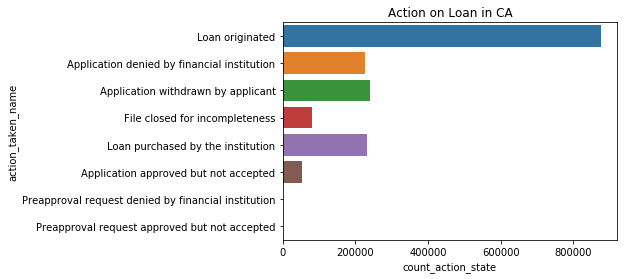

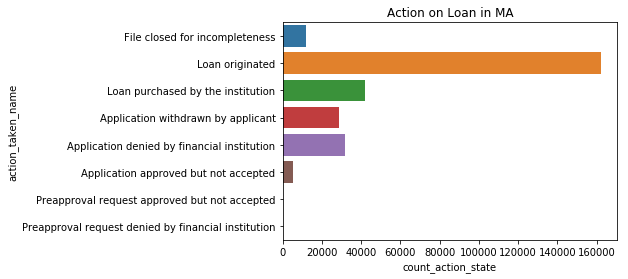

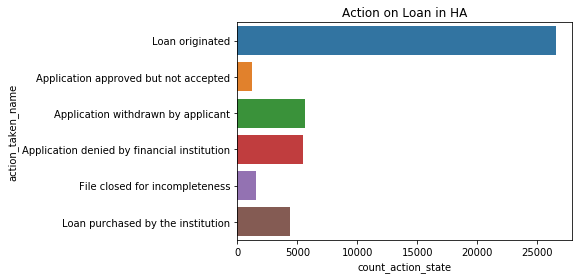

In [51]:
%matplotlib inline
ax_sm =sns.barplot(y='action_taken_name', x='count_action_state', data=data_state_name_CA)
ax_sm.set_title('Action on Loan in CA')
plt.show()

ax_sm =sns.barplot(y='action_taken_name', x='count_action_state', data=data_state_name_MA)
ax_sm.set_title('Action on Loan in MA')
plt.show()

ax_sm =sns.barplot(y='action_taken_name', x='count_action_state', data=data_state_name_Ha)
ax_sm.set_title('Action on Loan in HA')
plt.show()

In [52]:
#Sex groups 
data['count_sex']=data.groupby(['action_taken_name','applicant_sex_name','state_name'])['applicant_sex_name'].transform('count')
data_state_sex=data.drop_duplicates(subset=['action_taken_name','applicant_ethnicity_name','state_name'])
data_state_sex=data_state_sex[['action_taken_name','state_name','applicant_sex_name','count_sex']]
data_sex_CA=data_state_sex[data_state_sex['state_name']=='California']
data_sex_MA=data_state_sex[data_state_sex['state_name']=='Massachusetts']
data_sex_HA=data_state_sex[data_state_sex['state_name']=='Hawaii']

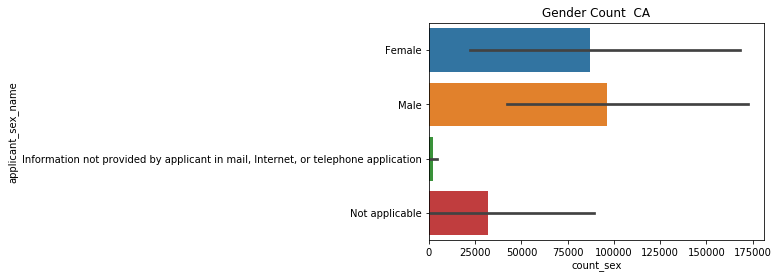

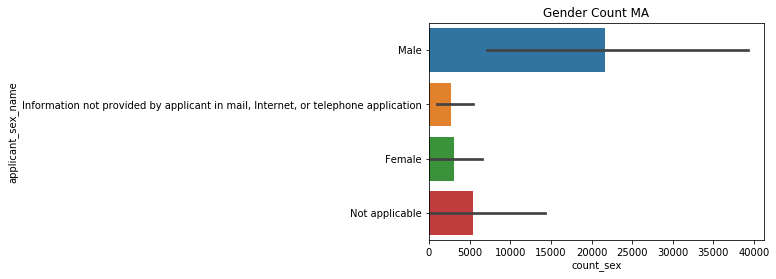

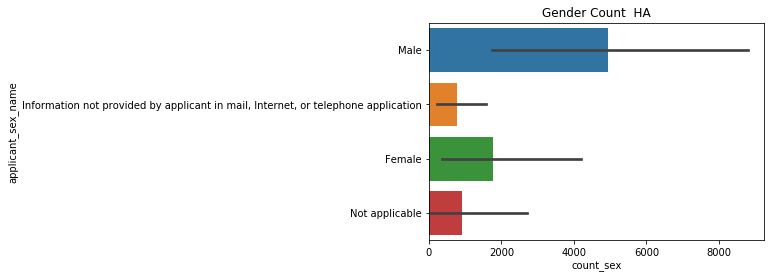

In [53]:
%matplotlib inline
ax_sm =sns.barplot(y='applicant_sex_name', x='count_sex', data=data_sex_CA)
ax_sm.set_title('Gender Count  CA')
plt.show()

ax_sm =sns.barplot(y='applicant_sex_name', x='count_sex', data=data_sex_MA)
ax_sm.set_title('Gender Count MA')
plt.show()

ax_sm =sns.barplot(y='applicant_sex_name', x='count_sex', data=data_sex_HA)
ax_sm.set_title('Gender Count  HA')
plt.show()

In [54]:
#Ethnic groups 
#distribution of loan by state
data['count_ethnic']=data.groupby(['action_taken_name','applicant_ethnicity_name','state_name'])['applicant_ethnicity_name'].transform('count')
data_state_ethnic=data.drop_duplicates(subset=['action_taken_name','applicant_ethnicity_name','state_name'])
data_state_ethnic=data_state_ethnic[['action_taken_name','state_name','applicant_ethnicity_name','count_ethnic']]


In [38]:
data_state_ethnic[(data_state_ethnic['state_name']=='California') & (data_state_ethnic['applicant_ethnicity_name']=='Not Hispanic or Latino')]

,action_taken_name,state_name,applicant_ethnicity_name,count_ethnic
1,Application denied by financial institution,California,Not Hispanic or Latino,135120
4,Loan originated,California,Not Hispanic or Latino,577283
5,Application withdrawn by applicant,California,Not Hispanic or Latino,146318
14,Loan purchased by the institution,California,Not Hispanic or Latino,62636
83,File closed for incompleteness,California,Not Hispanic or Latino,47288
147,Application approved but not accepted,California,Not Hispanic or Latino,32705
86127,Preapproval request denied by financial instit...,California,Not Hispanic or Latino,45
126879,Preapproval request approved but not accepted,California,Not Hispanic or Latino,44


In [55]:
data_ethnic_CA=data_state_ethnic[data_state_ethnic['state_name']=='California']
data_ethnic_MA=data_state_ethnic[data_state_ethnic['state_name']=='Massachusetts']
data_ethnic_HA=data_state_ethnic[data_state_ethnic['state_name']=='Hawaii']

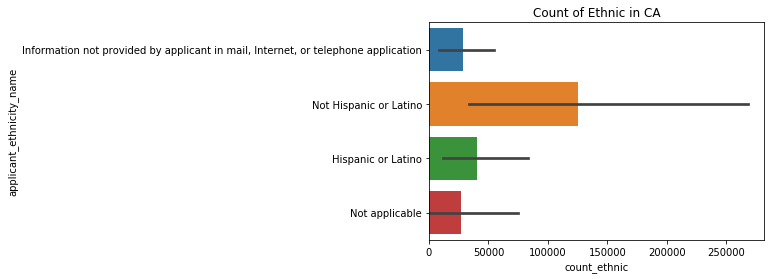

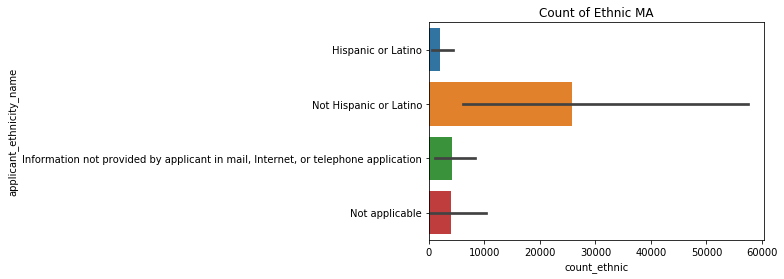

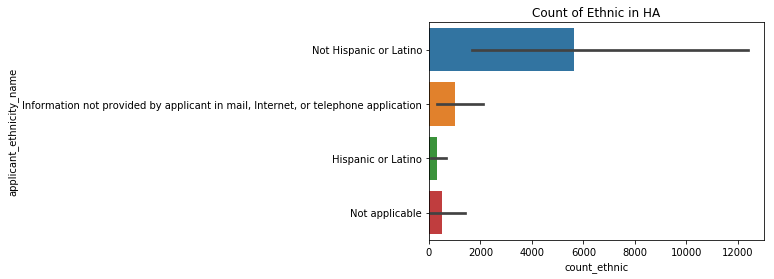

In [56]:
%matplotlib inline
ax_sm =sns.barplot(y='applicant_ethnicity_name', x='count_ethnic', data=data_ethnic_CA)
ax_sm.set_title('Count of Ethnic in CA')
plt.show()

ax_sm =sns.barplot(y='applicant_ethnicity_name', x='count_ethnic', data=data_ethnic_MA)
ax_sm.set_title('Count of Ethnic MA')
plt.show()

ax_sm =sns.barplot(y='applicant_ethnicity_name', x='count_ethnic', data=data_ethnic_HA)
ax_sm.set_title('Count of Ethnic in HA')
plt.show()

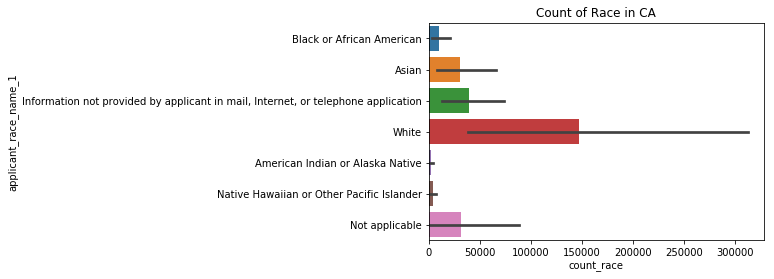

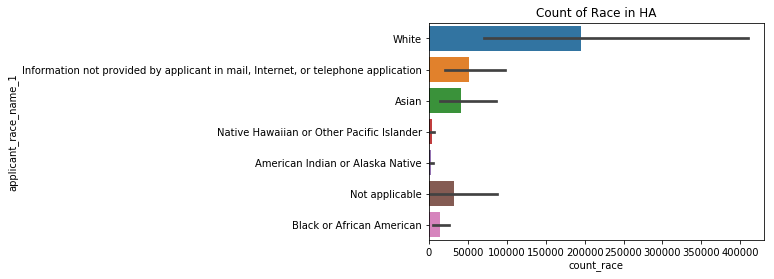

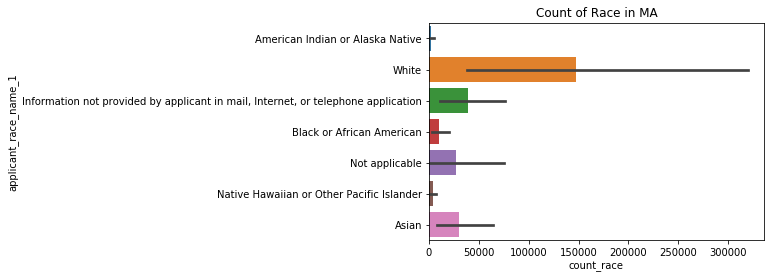

In [57]:
#Loan Status and Race
data['count_race']=data.groupby(['action_taken_name','applicant_race_name_1'])['applicant_race_name_1'].transform('count')
data.head(20)
data_state_race=data.drop_duplicates(subset=['action_taken_name','applicant_race_name_1','state_name'])
data_state_race=data_state_race[['state_name','action_taken_name','applicant_race_name_1','count_race']]

data_race_CA=data_state_race[data_state_race['state_name']=='California']
data_race_MA=data_state_race[data_state_race['state_name']=='Massachusetts']
data_race_HA=data_state_race[data_state_race['state_name']=='Hawaii']


ax_sm =sns.barplot(y='applicant_race_name_1', x='count_race', data=data_race_CA)
# # #ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax_sm.set_title('Count of Race in CA')
plt.figure()


ax_sm =sns.barplot(y='applicant_race_name_1', x='count_race', data=data_race_HA)
# # #ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax_sm.set_title('Count of Race in HA')
plt.figure()

ax_sm =sns.barplot(y='applicant_race_name_1', x='count_race', data=data_race_MA)
# # #ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax_sm.set_title('Count of Race in MA')
plt.figure()


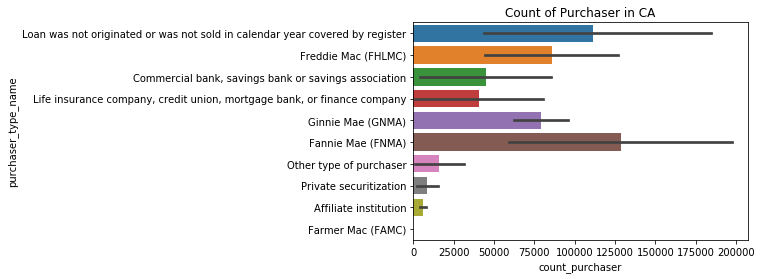

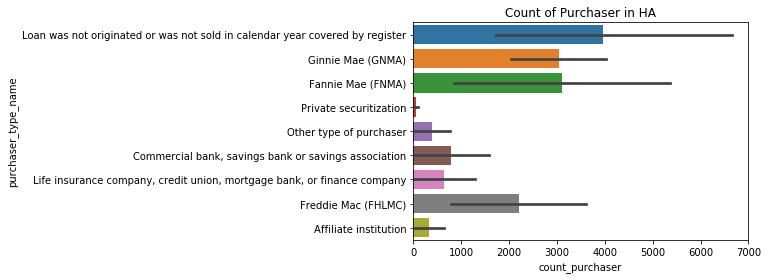

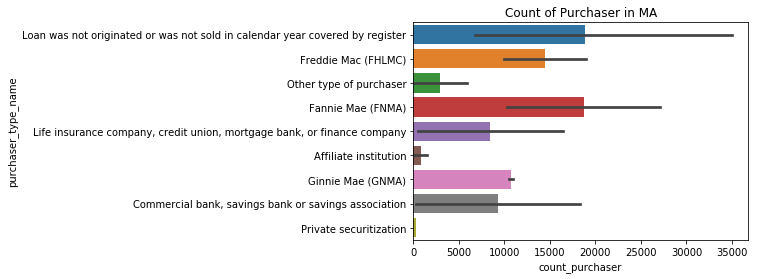

In [58]:
#purchaser
data['count_purchaser']=data.groupby(['action_taken_name','purchaser_type_name','state_name'])['purchaser_type_name'].transform('count')

data_purchase=data.drop_duplicates(subset=['action_taken_name','purchaser_type_name','state_name'])
data_purchase=data_purchase[['state_name','action_taken_name','purchaser_type_name','count_purchaser']]


data_purchase_CA=data_purchase[data_purchase['state_name']=='California']
data_purchase_MA=data_purchase[data_purchase['state_name']=='Massachusetts']
data_purchase_HA=data_purchase[data_purchase['state_name']=='Hawaii']


ax_sm =sns.barplot(y='purchaser_type_name', x='count_purchaser', data=data_purchase_CA)
ax_sm.set_title('Count of Purchaser in CA')
plt.figure()


ax_sm =sns.barplot(y='purchaser_type_name', x='count_purchaser', data=data_purchase_HA)
ax_sm.set_title('Count of Purchaser in HA')
plt.figure()

ax_sm =sns.barplot(y='purchaser_type_name', x='count_purchaser', data=data_purchase_MA)
ax_sm.set_title('Count of Purchaser in MA')
plt.figure()



In [59]:
%matplotlib inline
!pip install ggplot

You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


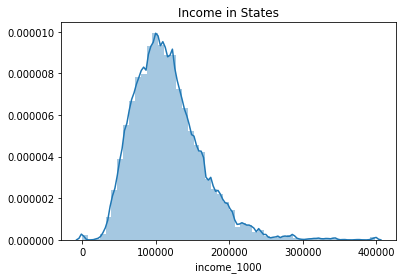

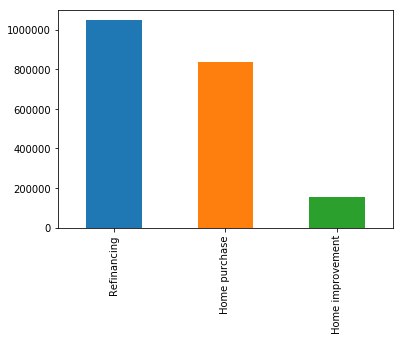

In [60]:
#Applicant Income Distribution
#actionStatus = "Loan originated"
from ggplot import *
data['income_1000']=data['tract_to_msamd_income']*1000
data['loan_amount']=data['loan_amount_000s']*1000
sns.distplot(data.income_1000.dropna(), hist=True).set_title('Income in States')
plt.show()

#loan purpose type   and loan purpose type and their action 
d1=data['loan_purpose_name'].value_counts()

%matplotlib inline
d1.plot.bar(x='count' ,y='loan_purpose_name')
#plot.show()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


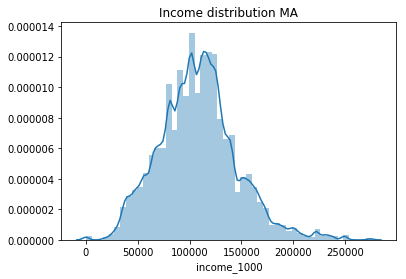

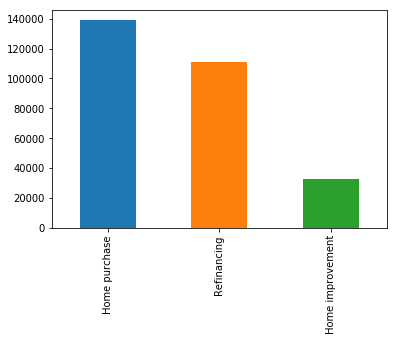

In [61]:
#income distribution MA
from ggplot import *
salary_range_Ma['income_1000']=salary_range_Ma['tract_to_msamd_income']*1000
salary_range_Ma['loan_amount']=salary_range_Ma['loan_amount_000s']*1000
sns.distplot(salary_range_Ma.income_1000.dropna(), hist=True).set_title('Income distribution MA')

plt.show()

#loan purpose type   and loan purpose type and their action 
d1=salary_range_Ma['loan_purpose_name'].value_counts()

%matplotlib inline
d1.plot.bar(x='count' ,y='loan_purpose_name')
#plot.show()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


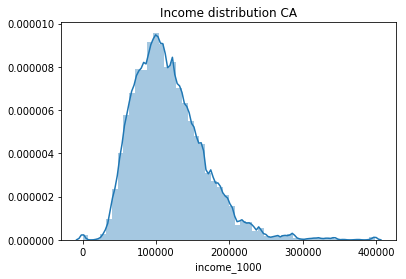

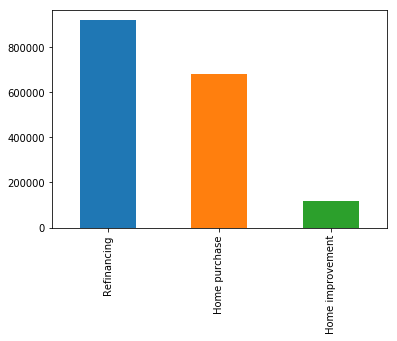

In [62]:
#income distribution CA
from ggplot import *
salary_range_ca['income_1000']=salary_range_ca['tract_to_msamd_income']*1000
salary_range_ca['loan_amount']=salary_range_ca['loan_amount_000s']*1000
sns.distplot(salary_range_ca.income_1000.dropna(), hist=True).set_title('Income distribution CA')

plt.show()

#loan purpose type   and loan purpose type and their action 
d1=salary_range_ca['loan_purpose_name'].value_counts()

%matplotlib inline
d1.plot.bar(x='count' ,y='loan_purpose_name')
#plot.show()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


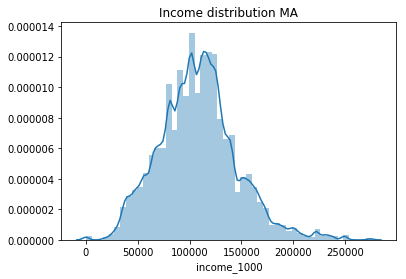

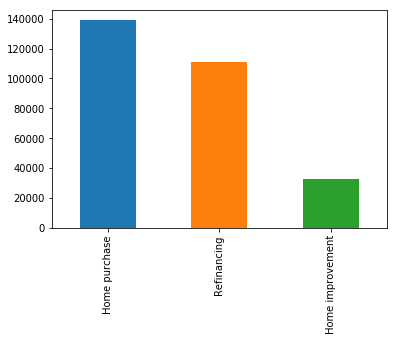

In [63]:
#income distribution MA
from ggplot import *
salary_range_Ma['income_1000']=salary_range_Ma['tract_to_msamd_income']*1000
salary_range_Ma['loan_amount']=salary_range_Ma['loan_amount_000s']*1000
sns.distplot(salary_range_Ma.income_1000.dropna(), hist=True).set_title('Income distribution MA')

plt.show()

#loan purpose type   and loan purpose type and their action 
d1=salary_range_Ma['loan_purpose_name'].value_counts()

%matplotlib inline
d1.plot.bar(x='count' ,y='loan_purpose_name')
#plot.show()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


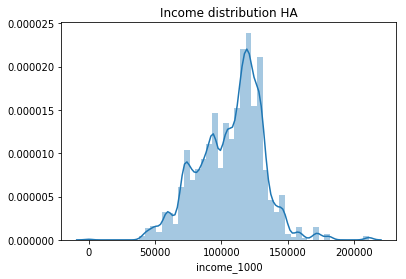

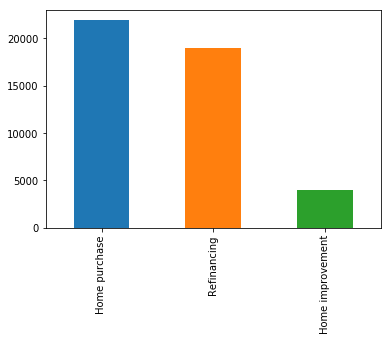

In [64]:
#income distribution by state:   HA
#salary_range_Ha,salary_range_Ma, salary_range_ca

from ggplot import *
salary_range_Ha['income_1000']=salary_range_Ha['tract_to_msamd_income']*1000
salary_range_Ha['loan_amount']=salary_range_Ha['loan_amount_000s']*1000
sns.distplot(salary_range_Ha.income_1000.dropna(), hist=True).set_title('Income distribution HA')

plt.show()

#loan purpose type   and loan purpose type and their action 
d1=salary_range_Ha['loan_purpose_name'].value_counts()

%matplotlib inline
d1.plot.bar(x='count' ,y='loan_purpose_name')
#plot.show()

In [65]:
print(data[data.action_taken_name == 'Loan originated'].population.sum()/data[data.action_taken_name == 'Loan originated'].population.count())
print(data[data.action_taken_name != 'Loan originated'].population.sum()/data[data.action_taken_name != 'Loan originated'].population.count())


5767.865925419988
5800.211738495908


In [66]:
#data['agency_name'].value_counts()
print(data['agency_name'].where(data['state_name']=='California').value_counts())
print()
print(data['agency_name'].where(data['state_name']=='Massachusetts').value_counts())
print()
print(data['agency_name'].where(data['state_name']=='Hawaii').value_counts())



Department of Housing and Urban Development    1005353
Consumer Financial Protection Bureau            545436
National Credit Union Administration             74203
Federal Deposit Insurance Corporation            47492
Office of the Comptroller of the Currency        30729
Federal Reserve System                           11246
Name: agency_name, dtype: int64

Department of Housing and Urban Development    113473
Consumer Financial Protection Bureau            65045
Federal Deposit Insurance Corporation           54329
National Credit Union Administration            28712
Federal Reserve System                          10924
Office of the Comptroller of the Currency       10063
Name: agency_name, dtype: int64

Department of Housing and Urban Development    22212
Consumer Financial Protection Bureau           12648
Federal Deposit Insurance Corporation           3777
National Credit Union Administration            3099
Office of the Comptroller of the Currency       1901
Federal Reserve

In [67]:
print('State of CA and Purchaser type and Loan actions')
print(data['purchaser_type_name'].where(data['state_name']=='California').value_counts())
print()
print(data['action_taken_name'].where(data['state_name']=='California').value_counts())

print()
print('State of MA and Purchaser type and Loan actions')
print(data['purchaser_type_name'].where(data['state_name']=='Massachusetts').value_counts())
print()
print(data['action_taken_name'].where(data['state_name']=='Massachusetts').value_counts())

print()
print('State of HA and Purchaser type and Loan actions')

print(data['purchaser_type_name'].where(data['state_name']=='Hawaii').value_counts())
print()
print(data['action_taken_name'].where(data['state_name']=='Hawaii').value_counts())

State of CA and Purchaser type and Loan actions
Loan was not originated or was not sold in calendar year covered by register    893403
Fannie Mae (FNMA)                                                               257246
Freddie Mac (FHLMC)                                                             171975
Ginnie Mae (GNMA)                                                               158456
Commercial bank, savings bank or savings association                             89764
Life insurance company, credit union, mortgage bank, or finance company          82080
Other type of purchaser                                                          31979
Private securitization                                                           17202
Affiliate institution                                                            12319
Farmer Mac (FAMC)                                                                   35
Name: purchaser_type_name, dtype: int64

Loan originated                          

In [68]:
#1 create 3 data for 3 states  
#2 create dummies for each 
#3  yest and train  set 
#4 create function to do all the modeling and create output based on states


got_loan_features=data[['action_taken_name','income_1000','loan_amount','hud_median_family_income',
                            'number_of_1_to_4_family_units','number_of_owner_occupied_units',
                            'applicant_sex_name','co_applicant_sex_name','property_type_name', 'preapproval_name',
    'msamd_name', 'loan_type_name','loan_purpose_name',
    'lien_status_name','hoepa_status_name', 'county_name','state_name',
        'co_applicant_race_name_1', 'co_applicant_ethnicity_name',
        'applicant_race_name_1', 'applicant_ethnicity_name','purchaser_type_name']]

In [1]:
state=data['state_name'].value_counts()



NameError: name 'data' is not defined

In [69]:
got_loan_features.head(4)

,action_taken_name,income_1000,loan_amount,hud_median_family_income,number_of_1_to_4_family_units,number_of_owner_occupied_units,applicant_sex_name,co_applicant_sex_name,property_type_name,preapproval_name,...,loan_purpose_name,lien_status_name,hoepa_status_name,county_name,state_name,co_applicant_race_name_1,co_applicant_ethnicity_name,applicant_race_name_1,applicant_ethnicity_name,purchaser_type_name
0,Loan originated,69610.000610,324000.0,97400.0,1316.0,903.0,Female,No co-applicant,One-to-four family dwelling (other than manufa...,Preapproval was not requested,...,Home purchase,Secured by a first lien,Not a HOEPA loan,Alameda County,California,No co-applicant,No co-applicant,Black or African American,"Information not provided by applicant in mail,...",Loan was not originated or was not sold in cal...
1,Application denied by financial institution,116010.002136,185000.0,63200.0,1743.0,1215.0,Female,No co-applicant,One-to-four family dwelling (other than manufa...,Not applicable,...,Home purchase,Secured by a first lien,Not a HOEPA loan,Riverside County,California,No co-applicant,No co-applicant,Asian,Not Hispanic or Latino,Loan was not originated or was not sold in cal...
2,Loan originated,141740.005493,1079000.0,97400.0,1105.0,592.0,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",One-to-four family dwelling (other than manufa...,Not applicable,...,Home purchase,Secured by a first lien,Not a HOEPA loan,Alameda County,California,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...","Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",Loan was not originated or was not sold in cal...
3,File closed for incompleteness,104790.000916,290000.0,104800.0,2227.0,1675.0,Male,No co-applicant,One-to-four family dwelling (other than manufa...,Preapproval was not requested,...,Home purchase,Secured by a first lien,Not a HOEPA loan,Middlesex County,Massachusetts,No co-applicant,No co-applicant,American Indian or Alaska Native,Hispanic or Latino,Loan was not originated or was not sold in cal...


In [54]:
got_loan_features.isnull().sum()

action_taken_name                     0
income_1000                        7812
loan_amount                         945
hud_median_family_income           7812
number_of_1_to_4_family_units      7812
number_of_owner_occupied_units     7812
applicant_sex_name                    0
co_applicant_sex_name                 0
property_type_name                    0
preapproval_name                      0
msamd_name                        60975
loan_type_name                        0
loan_purpose_name                     0
lien_status_name                      0
hoepa_status_name                     0
county_name                        2272
state_name                            0
co_applicant_race_name_1              0
co_applicant_ethnicity_name           0
applicant_race_name_1                 0
applicant_ethnicity_name              0
purchaser_type_name                   0
dtype: int64

In [55]:
got_loan_features.shape  #(52015, 20)  we had county_name  with 31 , msamd_name with 44, 
                         # number_of_owner_occupied_units  35, number_of_1_to_4_family_units 35, 
                        #hud_median_family_income 35, income_1000 35 records are null, so we can remove them.
        

(2041873, 22)

In [70]:
#all records with missing values are dropped from rows
got_loan_features=got_loan_features.dropna()

In [72]:
got_loan_features.shape

(1980012, 22)

In [74]:
#create target variable Loan Action=1 if loan originated ; Otherwise Loan Action=0(churn)
got_loan_features['Loan Action']= got_loan_features['action_taken_name']== 'Loan originated'


In [75]:
got_loan_features.columns

Index(['action_taken_name', 'income_1000', 'loan_amount',
       'hud_median_family_income', 'number_of_1_to_4_family_units',
       'number_of_owner_occupied_units', 'applicant_sex_name',
       'co_applicant_sex_name', 'property_type_name', 'preapproval_name',
       'msamd_name', 'loan_type_name', 'loan_purpose_name', 'lien_status_name',
       'hoepa_status_name', 'county_name', 'state_name',
       'co_applicant_race_name_1', 'co_applicant_ethnicity_name',
       'applicant_race_name_1', 'applicant_ethnicity_name',
       'purchaser_type_name', 'Loan Action'],
      dtype='object')

In [76]:
got_loan_features = got_loan_features.drop(['action_taken_name'],axis=1)

In [77]:
# CA featurs 
got_loan_features_CA=got_loan_features[got_loan_features['state_name']=='California']

X_CA=pd.get_dummies(got_loan_features_CA[['income_1000', 'loan_amount','hud_median_family_income',
       'number_of_1_to_4_family_units', 'number_of_owner_occupied_units',
       'applicant_sex_name', 'co_applicant_sex_name', 'property_type_name',
       'preapproval_name', 'msamd_name', 'loan_type_name', 'loan_purpose_name',
       'lien_status_name', 'hoepa_status_name', 'county_name',
       'co_applicant_race_name_1', 'co_applicant_ethnicity_name',
       'applicant_race_name_1', 'applicant_ethnicity_name','purchaser_type_name']], drop_first=True)

Y_CA=pd.get_dummies(got_loan_features_CA['Loan Action'], drop_first=True)


In [78]:
#MA features 
got_loan_features_MA=got_loan_features[got_loan_features['state_name']=='Massachusetts']

X_MA=pd.get_dummies(got_loan_features_MA[['income_1000', 'loan_amount','hud_median_family_income',
       'number_of_1_to_4_family_units', 'number_of_owner_occupied_units',
       'applicant_sex_name', 'co_applicant_sex_name', 'property_type_name',
       'preapproval_name', 'msamd_name', 'loan_type_name', 'loan_purpose_name',
       'lien_status_name', 'hoepa_status_name', 'county_name',
       'co_applicant_race_name_1', 'co_applicant_ethnicity_name',
       'applicant_race_name_1', 'applicant_ethnicity_name','purchaser_type_name']], drop_first=True)

Y_MA=pd.get_dummies(got_loan_features_MA['Loan Action'], drop_first=True)


In [79]:
#Hawaii
got_loan_features_HA=got_loan_features[got_loan_features['state_name']=='Hawaii']



X_HA=pd.get_dummies(got_loan_features_HA[['income_1000', 'loan_amount','hud_median_family_income',
       'number_of_1_to_4_family_units', 'number_of_owner_occupied_units',
       'applicant_sex_name', 'co_applicant_sex_name', 'property_type_name',
       'preapproval_name', 'msamd_name', 'loan_type_name', 'loan_purpose_name',
       'lien_status_name', 'hoepa_status_name', 'county_name',
       'co_applicant_race_name_1', 'co_applicant_ethnicity_name',
       'applicant_race_name_1', 'applicant_ethnicity_name','purchaser_type_name']], drop_first=True)

Y_HA=pd.get_dummies(got_loan_features_HA['Loan Action'], drop_first=True)


In [80]:
X_CA.shape, X_MA.shape, X_HA.shape

((1666765, 118), (277282, 69), (35965, 55))

In [81]:
Y_CA.shape  , Y_MA.shape,Y_HA.shape

((1666765, 1), (277282, 1), (35965, 1))

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# sns.lmplot(x='income_1000', y='loan_amount', hue='Loan Action', data=got_loan_features, fit_reg=False, scatter_kws={'alpha':0.5})
# sns.barplot(X_CA="income_1000", Y_CA='Loan Action', data=got_loan_features_CA, palette='GnBu_d')
# plt.show()
# sns.barplot(X_CA="number_of_1_to_4_family_units", Y_CA='Loan Action', data=got_loan_features_CA, palette='GnBu_d')
# plt.show()



In [83]:
# from sklearn import preprocessing   Not a big difference in result 
# normalized_X = preprocessing.normalize(X)
#  I will normalize data for 5 column 
X_CA['income_1000_1']=abs((X_CA['income_1000'] - X_CA['income_1000'].mean()) / (X_CA['income_1000'].max() - X_CA['income_1000'].min()))

X_CA['loan_amount_1']=abs((X_CA['loan_amount'] - X_CA['loan_amount'].mean()) / (X_CA['loan_amount'].max() - X_CA['loan_amount'].min()))
X_CA['hud_median_family_income_1']=abs((X_CA['hud_median_family_income'] - X_CA['hud_median_family_income'].mean()) / (X_CA['hud_median_family_income'].max() - X_CA['hud_median_family_income'].min()))
X_CA['number_of_owner_occupied_units_1']=abs((X_CA['number_of_owner_occupied_units'] - X_CA['number_of_owner_occupied_units'].mean()) / (X_CA['number_of_owner_occupied_units'].max() - X_CA['number_of_owner_occupied_units'].min()))
X_CA['number_of_1_to_4_family_units_1']=abs((X_CA['number_of_1_to_4_family_units'] - X_CA['number_of_1_to_4_family_units'].mean()) / (X_CA['number_of_1_to_4_family_units'].max() - X_CA['number_of_1_to_4_family_units'].min()))

#after normalizing we drop original non normal columns from X
#.drop([''],axis=1)
X_CA.drop(['income_1000','loan_amount','hud_median_family_income','number_of_1_to_4_family_units','number_of_owner_occupied_units'],axis=1)


,"applicant_sex_name_Information not provided by applicant in mail, Internet, or telephone application",applicant_sex_name_Male,applicant_sex_name_Not applicable,"co_applicant_sex_name_Information not provided by applicant in mail, Internet, or telephone application",co_applicant_sex_name_Male,co_applicant_sex_name_No co-applicant,co_applicant_sex_name_Not applicable,property_type_name_Multifamily dwelling,property_type_name_One-to-four family dwelling (other than manufactured housing),preapproval_name_Preapproval was not requested,...,purchaser_type_name_Ginnie Mae (GNMA),"purchaser_type_name_Life insurance company, credit union, mortgage bank, or finance company",purchaser_type_name_Loan was not originated or was not sold in calendar year covered by register,purchaser_type_name_Other type of purchaser,purchaser_type_name_Private securitization,income_1000_1,loan_amount_1,hud_median_family_income_1,number_of_owner_occupied_units_1,number_of_1_to_4_family_units_1
0,0,0,0,0,0,1,0,0,1,1,...,0,0,1,0,0,0.120281,2.112828e-04,0.264475,0.058345,0.056229
1,0,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0.003903,5.039150e-04,0.141700,0.001322,0.001638
2,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0.060632,1.378194e-03,0.264475,0.117821,0.084824
4,0,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0.186722,4.449675e-04,0.264475,0.114761,0.045794
5,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0.025473,4.639149e-04,0.298470,0.129678,0.109218
6,1,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0.120281,7.560164e-07,0.264475,0.058345,0.056229
7,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0.106536,2.091775e-04,0.141700,0.138284,0.138625
8,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.069892,5.733888e-04,0.141700,0.041134,0.056636
9,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0.050906,1.549289e-05,0.264475,0.048750,0.058691
10,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0.022884,1.902301e-04,0.000817,0.096178,0.050289


In [84]:
X_MA['income_1000_1']=abs((X_MA['income_1000'] - X_MA['income_1000'].mean()) / (X_MA['income_1000'].max() - X_MA['income_1000'].min()))

X_MA['loan_amount_1']=abs((X_MA['loan_amount'] - X_MA['loan_amount'].mean()) / (X_MA['loan_amount'].max() - X_MA['loan_amount'].min()))
X_MA['hud_median_family_income_1']=abs((X_MA['hud_median_family_income'] - X_MA['hud_median_family_income'].mean()) / (X_MA['hud_median_family_income'].max() - X_MA['hud_median_family_income'].min()))
X_MA['number_of_owner_occupied_units_1']=abs((X_MA['number_of_owner_occupied_units'] - X_MA['number_of_owner_occupied_units'].mean()) / (X_MA['number_of_owner_occupied_units'].max() - X_MA['number_of_owner_occupied_units'].min()))
X_MA['number_of_1_to_4_family_units_1']=abs((X_MA['number_of_1_to_4_family_units'] - X_MA['number_of_1_to_4_family_units'].mean()) / (X_MA['number_of_1_to_4_family_units'].max() - X_MA['number_of_1_to_4_family_units'].min()))

#after normalizing we drop original non normal columns from X
#.drop([''],axis=1)
X_MA.drop(['income_1000','loan_amount','hud_median_family_income','number_of_1_to_4_family_units','number_of_owner_occupied_units'],axis=1)


,"applicant_sex_name_Information not provided by applicant in mail, Internet, or telephone application",applicant_sex_name_Male,applicant_sex_name_Not applicable,"co_applicant_sex_name_Information not provided by applicant in mail, Internet, or telephone application",co_applicant_sex_name_Male,co_applicant_sex_name_No co-applicant,co_applicant_sex_name_Not applicable,property_type_name_Multifamily dwelling,property_type_name_One-to-four family dwelling (other than manufactured housing),preapproval_name_Preapproval was not requested,...,purchaser_type_name_Ginnie Mae (GNMA),"purchaser_type_name_Life insurance company, credit union, mortgage bank, or finance company",purchaser_type_name_Loan was not originated or was not sold in calendar year covered by register,purchaser_type_name_Other type of purchaser,purchaser_type_name_Private securitization,income_1000_1,loan_amount_1,hud_median_family_income_1,number_of_owner_occupied_units_1,number_of_1_to_4_family_units_1
3,0,1,0,0,0,1,0,0,1,1,...,0,0,1,0,0,0.011866,2.618023e-05,0.330687,0.102626,0.086079
13,0,1,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0.091897,1.489041e-04,0.330687,0.015907,0.023705
19,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0.351593,5.334161e-04,0.055817,0.119026,0.143896
26,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0.049234,7.466511e-05,0.213816,0.062879,0.030661
32,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0.049234,7.331831e-05,0.213816,0.062879,0.030661
37,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0.037044,1.945305e-04,0.055817,0.011870,0.033957
39,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0.091135,2.079302e-05,0.213816,0.304827,0.187493
43,0,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0.140295,8.678633e-05,0.055817,0.145928,0.043898
50,1,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0.235568,2.027762e-04,0.213816,0.115837,0.008897
71,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0.019408,9.510032e-06,0.055817,0.133451,0.056687


In [85]:
X_HA['income_1000_1']=abs((X_HA['income_1000'] - X_HA['income_1000'].mean()) / (X_HA['income_1000'].max() - X_HA['income_1000'].min()))

X_HA['loan_amount_1']=abs((X_HA['loan_amount'] - X_HA['loan_amount'].mean()) / (X_HA['loan_amount'].max() - X_HA['loan_amount'].min()))
X_HA['hud_median_family_income_1']=abs((X_HA['hud_median_family_income'] - X_HA['hud_median_family_income'].mean()) / (X_HA['hud_median_family_income'].max() - X_HA['hud_median_family_income'].min()))
X_HA['number_of_owner_occupied_units_1']=abs((X_HA['number_of_owner_occupied_units'] - X_HA['number_of_owner_occupied_units'].mean()) / (X_HA['number_of_owner_occupied_units'].max() - X_HA['number_of_owner_occupied_units'].min()))
X_HA['number_of_1_to_4_family_units_1']=abs((X_HA['number_of_1_to_4_family_units'] - X_HA['number_of_1_to_4_family_units'].mean()) / (X_HA['number_of_1_to_4_family_units'].max() - X_HA['number_of_1_to_4_family_units'].min()))

#after normalizing we drop original non normal columns from X
#.drop([''],axis=1)
X_HA.drop(['income_1000','loan_amount','hud_median_family_income','number_of_1_to_4_family_units','number_of_owner_occupied_units'],axis=1)


,"applicant_sex_name_Information not provided by applicant in mail, Internet, or telephone application",applicant_sex_name_Male,applicant_sex_name_Not applicable,"co_applicant_sex_name_Information not provided by applicant in mail, Internet, or telephone application",co_applicant_sex_name_Male,co_applicant_sex_name_No co-applicant,co_applicant_sex_name_Not applicable,property_type_name_Multifamily dwelling,property_type_name_One-to-four family dwelling (other than manufactured housing),preapproval_name_Preapproval was not requested,...,purchaser_type_name_Ginnie Mae (GNMA),"purchaser_type_name_Life insurance company, credit union, mortgage bank, or finance company",purchaser_type_name_Loan was not originated or was not sold in calendar year covered by register,purchaser_type_name_Other type of purchaser,purchaser_type_name_Private securitization,income_1000_1,loan_amount_1,hud_median_family_income_1,number_of_owner_occupied_units_1,number_of_1_to_4_family_units_1
67,0,1,0,0,0,1,0,0,1,1,...,0,0,1,0,0,0.103293,0.001394,0.16074,0.136638,0.196500
91,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0.075449,0.000288,0.83926,0.190082,0.163446
157,0,1,0,0,0,0,0,0,1,1,...,1,0,0,0,0,0.063997,0.001341,0.83926,0.035752,0.045425
207,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0.072373,0.000987,0.83926,0.217685,0.344349
217,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0.113166,0.001520,0.16074,0.234405,0.033339
253,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0.035194,0.000514,0.16074,0.176739,0.000263
265,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0.103293,0.000455,0.16074,0.136638,0.196500
303,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0.169908,0.003503,0.16074,0.108778,0.361016
315,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0.152084,0.001941,0.16074,0.072898,0.074188
319,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0.124636,0.000348,0.16074,0.036853,0.038984


In [ ]:
X_CA[['income_1000_1','loan_amount_1','hud_median_family_income_1','number_of_1_to_4_family_units_1','number_of_owner_occupied_units_1']]

In [87]:
!pip install --upgrade pip

    100% |████████████████████████████████| 1.3MB 1.2MB/s eta 0:00:01
  Found existing installation: pip 9.0.1
    Uninstalling pip-9.0.1:
      Successfully uninstalled pip-9.0.1


In [88]:
!pip install xgboost

In [89]:
from xgboost import XGBClassifier
from sklearn.cross_validation import train_test_split
from xgboost.sklearn import XGBClassifier 
from sklearn.ensemble import GradientBoostingClassifier

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [90]:
#Splitting the dataset into the Training set and Test set
# from sklearn.cross_validation import train_test_split

seed = 7
num_trees = 120

X_train, X_test, y_train, y_test = train_test_split(X_CA, Y_CA, test_size = 0.30, random_state =seed)
model = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=200)
model.fit(X_train, y_train)
model1= GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
model1.fit(X_train, y_train)
print("Xgboosting train set score {}".format(model.score(X_train,y_train)))
print("Xgboosting test set score  {}".format(model.score(X_test,y_test)))
print("gboosting train set score {}".format(model1.score(X_train,y_train)))
print("gboosting test set score  {}".format(model1.score(X_test,y_test)))


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but 

Xgboosting train set score 0.8848667435193082


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Xgboosting test set score  0.8834129952202868
gboosting train set score 0.8837619510857221
gboosting test set score  0.8823670579765214


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


classification report

             precision    recall  f1-score   support

          0       0.94      0.84      0.89    269607
          1       0.83      0.93      0.88    230423

avg / total       0.89      0.88      0.88    500030



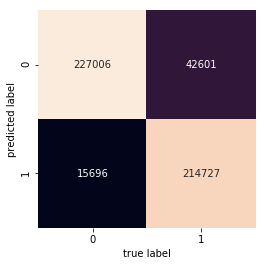

In [94]:
# test a random sample 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
y_pred_class= model.predict(X_test)
# We can take a look at the classification report for this classifier:
print('classification report')
print()
print(metrics.classification_report(y_pred_class, y_test))

mat = confusion_matrix(y_test, y_pred_class)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');


In [95]:
#Confusion matrix:
y_pred_class =model.predict(X_test)
mat_xg = confusion_matrix(y_test, y_pred_class)
mat_xg

predictions = [round(value) for value in y_pred_class]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy: 88.34%


In [ ]:
#verfify model 
# make class predictions for the testing set
y_pred_class = model.predict(X_test)

# calculate accuracy: percentage of correct predictions
from sklearn import metrics
#print(metrics.accuracy_score(X_test, predictions))


# Null accuracy :examine the class distribution of the testing set
#y_test.count()


# calculate the percentage of ones
# because y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones
#y_test.mean()

# calculate the percentage of zeros
#1 - y_test.mean()


# calculate the percentage of zeros
#1 - y_test.mean()

# calculate null accuracy in a single line of code
# only for binary classification problems coded as 0/1
#max(y_test.mean(), 1 - y_test.mean())


In [ ]:
#Comparing the true and predicted response values
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('False:', y_pred_class[0:25])



In [102]:
#Confusion matrix:
ypred_xg =model.predict(X_test)
mat_xg = confusion_matrix(y_test, ypred_xg)
mat_xg

# print the first 25 true and predicted responses
#print('True', y_test.values[0:25])
#print('Pred', y_pred_class[0:25])



# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print()
# use float to perform true division, not integer division
#print((TP + TN)/float(TP + TN + FP + FN))
print('Accuracy Score ' , metrics.accuracy_score(y_test, y_pred_class))
print()

#classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('classification_erro',classification_error)
#print('classification_erro',1 - metrics.accuracy_score(y_test, y_pred_class))

#sensitivity: When the actual value is positive, how often is the prediction correct?
sensitivity = TP / float(FN + TP)
print('sensitivity ',sensitivity)
#print(metrics.recall_score(y_test, y_pred_class))
print()

#Specificity: When the actual value is negative, how often is the prediction correct?
specificity = TN/(TN + FP)
print('specificity ',specificity)
print()
#False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
false_positive_rate = FP/float(TN + FP)
print('false_positive_rate',false_positive_rate)
#print('false_positive_rate',1 - specificity)

print()
#Precision:When a positive value is predicted, how often is the prediction correct?
#How "precise" is the classifier when predicting positive instances?
precision = TP / float(TP + FP)
print('precision ',precision)
#print(metrics.precision_score(y_test, y_pred_class))
print()



/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[[227006  15696]
 [ 42601 214727]]

Accuracy Score  0.8834129952202868

classification_erro 0.11658700477971322
sensitivity  0.8344486414226202

specificity  0.9353280978319091

false_positive_rate 0.0646719021680909

precision  0.9318817999939242



In [124]:
# #Adjusting the classification Threshold
# # print the first 10 predicted responses
# # 1D array (vector) of binary values (0, 1)
# model.predict(X_test)[0:10]

# # print the first 10 predicted probabilities of class membership
# model.predict_proba(X_test)[0:10]


# # print the first 10 predicted probabilities for class 1
print(model.predict_proba(X_test)[0:10, 1])


# # store the predicted probabilities for class 1
y_pred_prob = model.predict_proba(X_test)[:, 1]



# # allow plots to appear in the notebook
# %matplotlib inline
# import matplotlib.pyplot as plt
# # adjust the font size 
# plt.rcParams['font.size'] = 12

# # histogram of predicted probabilities

# # 8 bins
# plt.hist(y_pred_prob, bins=8)

# # x-axis limit from 0 to 1
# plt.xlim(0,1)
# plt.title('Histogram of predicted loan originated')
# plt.xlabel('Predicted probability of loan originated ')
# plt.ylabel('Frequency')




[0.9999603  0.99995947 0.04469233 0.5126257  0.01997975 0.3302691
 0.999969   0.04139796 0.99995494 0.9999647 ]


In [ ]:
# # predict loan originated if the predicted probability is greater than 0.3
# from sklearn.preprocessing import binarize
# # it will return 1 for all values above 0.3 and 0 otherwise
# # results are 2D so we slice out the first column
# y_pred_class = binarize(y_pred_prob, 0.3)#[0]

# # print the first 10 predicted probabilities
# y_pred_prob[0:10]

# # print the first 10 predicted classes with the lower threshold
# y_pred_class[0:10]

# # previous confusion matrix (default threshold of 0.5)
# print(confusion)

# # new confusion matrix (threshold of 0.3)
# print(metrics.confusion_matrix(y_test, y_pred_class))

In [ ]:
# If sensitivity has increased (used to be 0.24)
#print (46 / float(46 + 16))

# If specificity has decreased (used to be 0.91)
#print(80 / float(80 + 50))


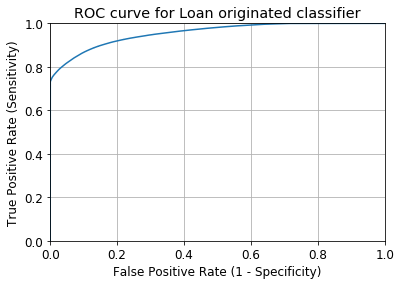

In [107]:
#Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?

#Answer: Plot the ROC curve.

# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Loan originated classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [108]:
# ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context
# You can't actually see the thresholds used to generate the curve on the ROC curve itself

# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])


print(evaluate_threshold(0.3))



print('threshold(0.3)  ',evaluate_threshold(0.3))



Sensitivity: 0.9107209475844059
Specificity: 0.8230463696220056
None
Sensitivity: 0.9107209475844059
Specificity: 0.8230463696220056
threshold(0.3)   None


In [109]:
#AUC is the percentage of the ROC plot that is underneath the curve:

# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))



0.9559588757821277


In [116]:
# calculate cross-validated AUC
from sklearn.cross_validation import cross_val_score
cross_val_score(model, X_CA, Y_CA,cv=10, scoring='roc_auc').mean()

IndexError: too many indices for array

(123,)
(123,)


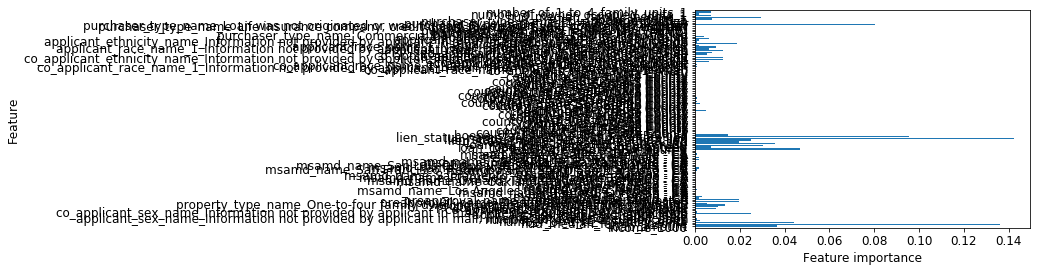

In [122]:
import numpy as np
def plot_feature_importances(anymodel):
    print(anymodel.feature_importances_.shape)
    print(X_CA.columns.shape)
    n_features = X_CA.shape[1]
    plt.barh(range(n_features), anymodel.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_CA.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
#dataset_train.shape
plot_feature_importances(model)
